In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-07 21:19:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.83MB/s    in 37s     

2020-06-07 21:19:41 (8.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# Ekstraksi File zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.5,
    #zoom_range = 20,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.5,
    #zoom_range = 20,
    fill_mode = 'nearest'
)

In [0]:
 datagen = ImageDataGenerator(validation_split= 0.3, rescale=1./255)

In [75]:
train_generator = datagen.flow_from_directory(
  directory = base_dir,  # direktori data latih
  target_size=(100, 150),  
  batch_size= 8,
  subset = 'training',
  class_mode='categorical')
     
validation_generator = datagen.flow_from_directory(
  directory = base_dir,  # direktori data latih
  target_size=(100, 150),  
  batch_size= 8,
  subset = 'validation',
  class_mode='categorical')

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='binary_crossentropy',
  optimizer=tf.optimizers.Adam(),
  metrics=['accuracy'])

In [78]:
model.fit(
  train_generator,
  steps_per_epoch=25,
  epochs=20,
  validation_data=validation_generator,
  validation_steps=5,
  verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.6424 - accuracy: 0.3500 - val_loss: 0.6352 - val_accuracy: 0.2250
Epoch 2/20
25/25 - 6s - loss: 0.5125 - accuracy: 0.5950 - val_loss: 0.3478 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 6s - loss: 0.3110 - accuracy: 0.8100 - val_loss: 0.2209 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 6s - loss: 0.2284 - accuracy: 0.8600 - val_loss: 0.0836 - val_accuracy: 1.0000
Epoch 5/20
25/25 - 7s - loss: 0.1597 - accuracy: 0.9000 - val_loss: 0.2043 - val_accuracy: 0.8750
Epoch 6/20
25/25 - 7s - loss: 0.1593 - accuracy: 0.9250 - val_loss: 0.0531 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 6s - loss: 0.1263 - accuracy: 0.9594 - val_loss: 0.1084 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 7s - loss: 0.0769 - accuracy: 0.9650 - val_loss: 0.0963 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 7s - loss: 0.1286 - accuracy: 0.9300 - val_loss: 0.0388 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 6s - loss: 0.1299 - accuracy: 0.9550 - val_loss: 0.0811 - val_accuracy: 0.9750
Epoch 11/20
25/25 -

Saving Gunting.png to Gunting (3).png
Saving gunting4.png to gunting4 (4).png
Saving gunting4-green.png to gunting4-green (9).png
Saving Gunting-green.png to Gunting-green (4).png
Saving rock.png to rock (3).png
Saving rock-green.png to rock-green (3).png
Gunting.png
ini kertas
gunting4.png
ini batu
gunting4-green.png
ini gunting
Gunting-green.png
ini gunting
rock.png
ini batu
rock-green.png
ini batu


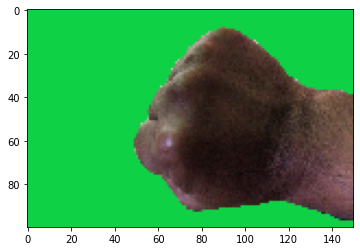

In [83]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #Predict Image
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print(fn)
  if hasil == 0:
    print('ini kertas')
  elif hasil == 1:
    print('ini batu')
  elif hasil == 2:
    print('ini gunting')